In [132]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
import pandas as pd
from scipy import stats
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno
import pickle
from sklearn.preprocessing import LabelEncoder

In [133]:
url = "https://raw.githubusercontent.com/diegojeda/Curso-Analytics---Drilling-Bits/master/Dataset/BLCat.csv"

base = pd.read_csv(url,error_bad_lines=False)

In [134]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Creamos las matrices para los modelos
X = base.drop('Log ROP', axis=1)
y = base[['Log ROP']]

# Dividimos los datos de manera aleatoria con el 25% para test y 75% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [135]:
# load the model from disk
loaded_model = pickle.load(open('svr_to_deploy.pkl', 'rb'))

In [136]:
feature_cols=base.drop('Log ROP', axis=1).columns

In [137]:
feature_cols

Index(['Unnamed: 0', 'Well', 'Size', 'Bit_Number', 'Re_Run', 'Reference',
       'Type', 'Structure', 'Formation', 'Log Footage', 'Depth in',
       'Depth out', 'Depth Average', 'Blades', 'Cutter size', 'Min Flow Rate',
       'Max Flow Rate', 'TFA', 'HSI', 'Log Min WOB', 'Max WOB', 'Mud Weight',
       'Drive_System', 'Min_RPM', 'Max_RPM', 'Torque Max', 'Torque Min',
       'Manufacturer'],
      dtype='object')

In [247]:
from itertools import product

Size=[8.5]
Re_Run=["N"]
Type=["PDC"]
Structure=["Anticlinal P"]
Formation=["Mirador"]
Footage=[150]
Depth_Average=[15000]
Blades = [13]
Cutter_size=[11]
Min_FR=list(range(100,500,10))
Max_FR=list(range(500,1100,10))
TFA=list(range(1,6,0.2))
HSI=list(range(1,6,0.2))
Min_WOB=list(np.linspace(0.2, 8.0, num=50))
Max_WOB=list(range(41,70,1))
Mud_Weight=[10]
Drive_System=["RSS"]
Min_RPM=list(range(10,70,1))
Max_RPM=list(range(71,161,1))
T_Min=list(range(5,25,1))
T_Max=list(range(26,55,1))
Manufacturer=["Smith"]

Data_exp=pd.DataFrame(list(product(Size,Re_Run,Type,Structure,Formation,Footage,Depth_Average,Blades,Cutter_size,Min_FR, Max_FR,TFA,HSI,Min_WOB,Max_WOB,Mud_Weight,Drive_System,Min_RPM,Max_RPM,T_Max,T_Min,Manufacturer)),
                 columns=["Size","Re_Run","Type","Structure","Formation","Footage","Depth Average","Blades","Cutter size","Min Flow Rate", "Max Flow Rate","TFA","HSI","Min WOB","Max WOB","Mud Weight","Drive_System","Min_RPM","Max_RPM","Torque Max","Torque Min","Manufacturer"])

Data_exp.iloc[0:10] # Primeras cinco filas

TypeError: 'float' object cannot be interpreted as an integer

In [139]:
Base_Frame = Data_exp.copy()
Base_Frame.columns

Index(['Size', 'Re_Run', 'Type', 'Structure', 'Formation', 'Footage',
       'Depth Average', 'Blades', 'Cutter size', 'Min Flow Rate',
       'Max Flow Rate', 'TFA', 'HSI', 'Min WOB', 'Max WOB', 'Mud Weight',
       'Drive_System', 'Min_RPM', 'Max_RPM', 'Torque Max', 'Torque Min',
       'Manufacturer'],
      dtype='object')

In [140]:
Data_exp

,Size,Re_Run,Type,Structure,Formation,Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,HSI,Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer
0,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,1,5,35,10,RSS,10,70,25,10,Smith
1,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,1,5,35,10,RSS,10,70,25,15,Smith
2,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,1,5,35,10,RSS,10,70,25,20,Smith
3,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,1,5,35,10,RSS,10,70,30,10,Smith
4,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,1,5,35,10,RSS,10,70,30,15,Smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14731195,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,35,50,10,RSS,60,180,45,15,Smith
14731196,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,35,50,10,RSS,60,180,45,20,Smith
14731197,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,35,50,10,RSS,60,180,50,10,Smith
14731198,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,35,50,10,RSS,60,180,50,15,Smith


In [141]:
Data_exp.Footage=np.log(Data_exp.Footage)

Data_exp["Min WOB"]=np.log(Data_exp["Min WOB"])

Data_exp = Data_exp.rename(columns = {"Footage":"Log Footage",
                              "Min WOB":"Log Min WOB"})

Data_exp.tail()

,Size,Re_Run,Type,Structure,Formation,Log Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,HSI,Log Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer
14731195,8.5,N,PDC,Anticlinal P,Mirador,4.60517,15000,13,13,400,...,5,3.555348,50,10,RSS,60,180,45,15,Smith
14731196,8.5,N,PDC,Anticlinal P,Mirador,4.60517,15000,13,13,400,...,5,3.555348,50,10,RSS,60,180,45,20,Smith
14731197,8.5,N,PDC,Anticlinal P,Mirador,4.60517,15000,13,13,400,...,5,3.555348,50,10,RSS,60,180,50,10,Smith
14731198,8.5,N,PDC,Anticlinal P,Mirador,4.60517,15000,13,13,400,...,5,3.555348,50,10,RSS,60,180,50,15,Smith
14731199,8.5,N,PDC,Anticlinal P,Mirador,4.60517,15000,13,13,400,...,5,3.555348,50,10,RSS,60,180,50,20,Smith


In [142]:
base = base.drop(['Log ROP',"Depth out","Depth in","Bit_Number","Reference","Well","Unnamed: 0"],axis=1)

In [143]:
base

,Size,Re_Run,Type,Structure,Formation,Log Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,HSI,Log Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer
0,36.0,N,Tricone,Anticlinal N,C5,4.406719,90.0,3.0,0.0,430.0,...,0.001451,1.609438,13.0,8.5,Rotary,60.0,80.0,5.0,3.0,Varel
1,26.0,N,Tricone,Anticlinal N,C5,2.708050,138.5,3.0,0.0,540.0,...,0.085069,2.890372,23.0,8.5,Rotary,48.0,48.0,15.0,2.0,Hycalog
2,26.0,R,Tricone,Anticlinal N,C5,6.563856,774.0,3.0,0.0,580.0,...,0.500000,3.218876,78.0,8.5,RSS,47.0,73.0,15.0,2.0,Hycalog
3,26.0,R,Tricone,Anticlinal N,C6,6.304449,774.0,3.0,0.0,580.0,...,0.500000,3.218876,78.0,8.5,RSS,47.0,73.0,15.0,2.0,Hycalog
4,26.0,N,Tricone,Anticlinal N,C6,6.082219,1821.5,3.0,0.0,900.0,...,0.842000,3.688879,55.0,9.6,RSS,144.0,168.0,15.0,2.0,Hughes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,8.5,N,PDC,Anticlinal F,Guadalupe,5.389072,14120.5,7.0,13.0,560.0,...,4.300000,2.708050,30.0,8.2,Rotary,90.0,120.0,8.0,6.0,Halliburton
208,8.5,N,PDC,Anticlinal F,Guadalupe,4.574711,14278.5,8.0,13.0,600.0,...,4.400000,2.251292,45.0,8.2,Rotary,78.0,115.0,9.0,7.0,Hughes
209,8.5,N,PDC,Anticlinal F,Guadalupe,5.288267,14426.0,8.0,13.0,300.0,...,2.400000,1.609438,35.0,8.3,Rotary,90.0,130.0,9.0,7.0,Smith
210,8.5,N,PDC,Anticlinal F,Guadalupe,4.025352,14602.5,8.0,13.0,300.0,...,5.500000,2.251292,30.0,8.4,Rotary,50.0,135.0,8.5,7.0,Smith


In [144]:
base_exp_pred=base.append(Data_exp)

In [145]:
base_exp_pred

,Size,Re_Run,Type,Structure,Formation,Log Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,HSI,Log Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer
0,36.0,N,Tricone,Anticlinal N,C5,4.406719,90.0,3.0,0.0,430.0,...,0.001451,1.609438,13.0,8.5,Rotary,60.0,80.0,5.0,3.0,Varel
1,26.0,N,Tricone,Anticlinal N,C5,2.708050,138.5,3.0,0.0,540.0,...,0.085069,2.890372,23.0,8.5,Rotary,48.0,48.0,15.0,2.0,Hycalog
2,26.0,R,Tricone,Anticlinal N,C5,6.563856,774.0,3.0,0.0,580.0,...,0.500000,3.218876,78.0,8.5,RSS,47.0,73.0,15.0,2.0,Hycalog
3,26.0,R,Tricone,Anticlinal N,C6,6.304449,774.0,3.0,0.0,580.0,...,0.500000,3.218876,78.0,8.5,RSS,47.0,73.0,15.0,2.0,Hycalog
4,26.0,N,Tricone,Anticlinal N,C6,6.082219,1821.5,3.0,0.0,900.0,...,0.842000,3.688879,55.0,9.6,RSS,144.0,168.0,15.0,2.0,Hughes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14731195,8.5,N,PDC,Anticlinal P,Mirador,4.605170,15000.0,13.0,13.0,400.0,...,5.000000,3.555348,50.0,10.0,RSS,60.0,180.0,45.0,15.0,Smith
14731196,8.5,N,PDC,Anticlinal P,Mirador,4.605170,15000.0,13.0,13.0,400.0,...,5.000000,3.555348,50.0,10.0,RSS,60.0,180.0,45.0,20.0,Smith
14731197,8.5,N,PDC,Anticlinal P,Mirador,4.605170,15000.0,13.0,13.0,400.0,...,5.000000,3.555348,50.0,10.0,RSS,60.0,180.0,50.0,10.0,Smith
14731198,8.5,N,PDC,Anticlinal P,Mirador,4.605170,15000.0,13.0,13.0,400.0,...,5.000000,3.555348,50.0,10.0,RSS,60.0,180.0,50.0,15.0,Smith


In [146]:
# Verificamos las categorias de cada variable categorica
print(base_exp_pred.Re_Run.unique())
print(base_exp_pred.Type.unique())
print(base_exp_pred.Structure.unique())
print(base_exp_pred.Formation.unique())
print(base_exp_pred.Drive_System.unique())
print(base_exp_pred.Manufacturer.unique())

['N' 'R' 'RR' 'R4' 'R5']
['Tricone' 'PDC' 'Impregnated' 'Hybrid']
['Anticlinal N' 'Anticlinal M' 'Anticlinal F' 'Anticlinal P' 'Imbricate'
 'Anticlinal G' 'Anticlinal D']
['C5' 'C6' 'C7' 'C8' 'Mirador' 'Los Cuervos' 'Barco' 'Guadalupe'
 'Colluvium' 'C2' 'C3' 'C4' 'Guayabo' 'Charte' 'Leon' 'C1' 'Sltn Market'
 'Guad. Shale' 'Guad. Upper' 'Gacheta']
['Rotary' 'RSS' 'Turbine' 'Motor']
['Varel' 'Hycalog' 'Hughes' 'Security' 'Smith' 'Halliburton']


In [147]:
# Identificamos las etiquetas de las categorias
categorical_features = ['Re_Run', 'Type', 'Structure',"Formation","Drive_System","Manufacturer"]

# Convert the variables to numerical
for i in range(6):
    new = le.fit_transform(base_exp_pred[categorical_features[i]])
    base_exp_pred[categorical_features[i]] = new

In [148]:
base_exp_pred.tail()

,Size,Re_Run,Type,Structure,Formation,Log Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,HSI,Log Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer
14731195,8.5,0,2,5,18,4.60517,15000.0,13.0,13.0,400.0,...,5.0,3.555348,50.0,10.0,1,60.0,180.0,45.0,15.0,4
14731196,8.5,0,2,5,18,4.60517,15000.0,13.0,13.0,400.0,...,5.0,3.555348,50.0,10.0,1,60.0,180.0,45.0,20.0,4
14731197,8.5,0,2,5,18,4.60517,15000.0,13.0,13.0,400.0,...,5.0,3.555348,50.0,10.0,1,60.0,180.0,50.0,10.0,4
14731198,8.5,0,2,5,18,4.60517,15000.0,13.0,13.0,400.0,...,5.0,3.555348,50.0,10.0,1,60.0,180.0,50.0,15.0,4
14731199,8.5,0,2,5,18,4.60517,15000.0,13.0,13.0,400.0,...,5.0,3.555348,50.0,10.0,1,60.0,180.0,50.0,20.0,4


In [149]:
# Importamos librerias para escalar los datos, dividir el dataset y traer el modelo
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
scaler = StandardScaler()
scaler.fit(base_exp_pred)
base_exp_pred = scaler.transform(base_exp_pred)
base_exp_pred

StandardScaler()

array([[ 9.61730632e+02, -1.25376401e-03,  5.08375572e+02, ...,
        -3.80578232e+00, -2.93929949e+00,  1.24398450e+02],
       [ 6.12009648e+02, -1.25376401e-03,  5.08375572e+02, ...,
        -2.63476012e+00, -3.18424323e+00, -2.48788642e+02],
       [ 6.12009648e+02,  2.97897362e+02,  5.08375572e+02, ...,
        -2.63476012e+00, -3.18424323e+00, -2.48788642e+02],
       ...,
       [-2.07396952e-03, -1.25376401e-03, -1.03528910e-04, ...,
         1.46381760e+00, -1.22469331e+00,  2.75282487e-03],
       [-2.07396952e-03, -1.25376401e-03, -1.03528910e-04, ...,
         1.46381760e+00,  2.53985472e-05,  2.75282487e-03],
       [-2.07396952e-03, -1.25376401e-03, -1.03528910e-04, ...,
         1.46381760e+00,  1.22474410e+00,  2.75282487e-03]])

In [150]:
len(Data_exp)

Data_List_Pred=base_exp_pred[-(len(Data_exp)+1):-1]

14731200

In [151]:
y_pred_rfs = loaded_model.predict(Data_List_Pred)
R_final = pd.DataFrame(np.exp(y_pred_rfs))
R_final.columns = ["ROP"]
#R_final
Max_ROP=max(np.exp(y_pred_rfs))
Indice=R_final.loc[R_final.ROP==Max_ROP].index
#Max_ROP
#Indice
P_Opt=Data_exp.iloc[Indice].T
#P_Opt

In [152]:
Max_ROP

32.91269857698708

In [153]:
P_Opt=Data_exp.iloc[Indice].T
P_Opt

,13591330
Size,8.5
Re_Run,N
Type,PDC
Structure,Anticlinal P
Formation,Mirador
Log Footage,4.60517
Depth Average,15000
Blades,13
Cutter size,13
Min Flow Rate,400


In [154]:
Base_Frame["ROP Predict"] = np.exp(y_pred_rfs)

In [155]:
Base_Frame

,Size,Re_Run,Type,Structure,Formation,Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer,ROP Predict
0,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,5,35,10,RSS,10,70,25,10,Smith,6.923544
1,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,5,35,10,RSS,10,70,25,15,Smith,2.916374
2,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,5,35,10,RSS,10,70,25,20,Smith,2.667838
3,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,5,35,10,RSS,10,70,30,10,Smith,2.724172
4,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,100,...,5,35,10,RSS,10,70,30,15,Smith,3.372610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14731195,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,180,45,15,Smith,6.674262
14731196,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,180,45,20,Smith,6.129001
14731197,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,180,50,10,Smith,5.701740
14731198,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,180,50,15,Smith,7.373845


In [156]:
Base_Frame.columns

Index(['Size', 'Re_Run', 'Type', 'Structure', 'Formation', 'Footage',
       'Depth Average', 'Blades', 'Cutter size', 'Min Flow Rate',
       'Max Flow Rate', 'TFA', 'HSI', 'Min WOB', 'Max WOB', 'Mud Weight',
       'Drive_System', 'Min_RPM', 'Max_RPM', 'Torque Max', 'Torque Min',
       'Manufacturer', 'ROP Predict'],
      dtype='object')

In [157]:
Test=Base_Frame[(#Base_Frame["Min Flow Rate"]==800)&
                (Base_Frame["Max Flow Rate"]==800)&
                (Base_Frame["TFA"]==2)&
                (Base_Frame["HSI"]==2)&
                #(Base_Frame["Min WOB"]==50)&
                (Base_Frame["Max WOB"]==50)&
                (Base_Frame["Min_RPM"]==60)&
                (Base_Frame["Torque Min"]==10)&
                (Base_Frame["Torque Max"]==50)
          ]

Test

,Size,Re_Run,Type,Structure,Formation,Footage,Depth Average,Blades,Cutter size,Min Flow Rate,...,Min WOB,Max WOB,Mud Weight,Drive_System,Min_RPM,Max_RPM,Torque Max,Torque Min,Manufacturer,ROP Predict
11936841,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,50,10,RSS,60,70,50,10,Smith,7.582363
11936859,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,50,10,RSS,60,81,50,10,Smith,7.125133
11936877,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,50,10,RSS,60,92,50,10,Smith,6.657714
11936895,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,50,10,RSS,60,103,50,10,Smith,6.195527
11936913,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,5,50,10,RSS,60,114,50,10,Smith,5.752103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12079509,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,136,50,10,Smith,5.765734
12079527,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,147,50,10,Smith,5.450472
12079545,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,158,50,10,Smith,5.166031
12079563,8.5,N,PDC,Anticlinal P,Mirador,100,15000,13,13,400,...,35,50,10,RSS,60,169,50,10,Smith,4.916712


In [158]:
Tabla=Test.pivot(index="Min WOB",columns="Min_RPM",values="ROP Predict")
print(Tabla)

Max_RPM       70        81        92        103       114       125       136  \
Min WOB                                                                         
5        7.582363  7.125133  6.657714  6.195527  5.752103  5.338384  4.962449   
6        7.866595  7.389460  6.898352  6.410107  5.939628  5.499046  5.097370   
7        8.092095  7.602718  7.095927  6.589610  6.099734  5.639402  5.218420   
8        8.267771  7.771863  7.255498  6.737302  6.234046  5.759606  5.324457   
9        8.401850  7.903685  7.382422  6.857171  6.345283  5.861235  5.416053   
10       8.501478  8.004252  7.481672  6.953128  6.436365  5.946307  5.494424   
11       8.572696  8.078789  7.557632  7.028726  6.510058  6.016871  5.560982   
12       8.620542  8.131717  7.614068  7.087081  6.568854  6.074843  5.617128   
13       8.649195  8.166740  7.654179  7.130875  6.614939  6.121945  5.664167   
14       8.662111  8.186952  7.680660  7.162397  6.650204  6.159696  5.703277   
15       8.662145  8.194929 

In [175]:
Test["Min WOB"].max()

35

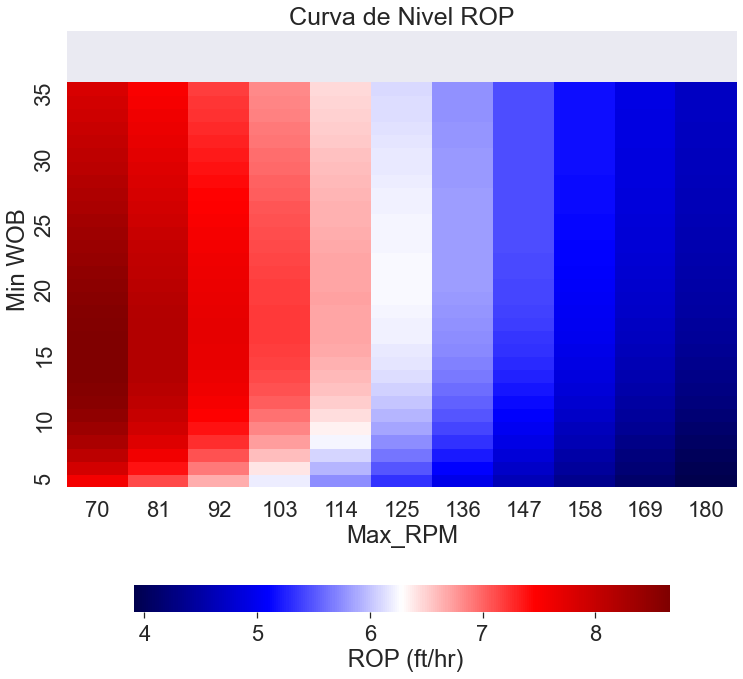

In [246]:
fig, ax = plt.subplots(figsize=(12,12))

title = "Curva de Nivel ROP"

plt.title(title,fontsize=25)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(Tabla,xticklabels=1,yticklabels=5,cmap="seismic", ax=ax,
            cbar_kws={"shrink": 0.8, "label":" ROP (ft/hr)","orientation": "horizontal"},
            annot_kws={'size':5}
           )
plt.ylim(0,Test["Min WOB"].max());